In [76]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('sales data.xlsx')
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [3]:
missing_value = df.isnull().sum()
missing_value

country            0
order_value_EUR    5
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        5
order_id           0
dtype: int64

In [4]:
missing_value[missing_value > 0]

order_value_EUR    5
device_type        5
dtype: int64

In [5]:
imputer= SimpleImputer(strategy= 'median')

df['order_value_EUR'] = imputer.fit_transform(df[['order_value_EUR']])

In [6]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        5
order_id           0
dtype: int64

In [7]:
df.device_type

0       Tablet
1       Tablet
2           PC
3       Mobile
4           PC
         ...  
996         PC
997     Tablet
998     Tablet
999         PC
1000        PC
Name: device_type, Length: 1001, dtype: object

In [8]:
imputer = SimpleImputer(strategy = 'most_frequent')

df[['device_type']] = imputer.fit_transform(df[['device_type']])

In [9]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64

In [10]:
df.dtypes

country             object
order_value_EUR    float64
cost                object
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [11]:
mixed_column = df['cost']

non_numeric_column = []

for value in mixed_column:
    if isinstance(value, str) and not value.isnumeric():
        non_numeric_column.append(value)
    

In [12]:
non_numeric_column

['XXX']

In [13]:
mask= df['cost'] == 'XXX'

df= df[~mask]

In [14]:
mixed_column = df['cost']

non_numeric_column= []

for value in mixed_column:
    if isinstance(value, str) and not value.isnumeric():
        non_numeric_column.append(value)

In [15]:
non_numeric_column

[]

In [16]:
df.dtypes

country             object
order_value_EUR    float64
cost                object
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [17]:
df['cost'] = df['cost'].astype(float)

In [18]:
df.dtypes

country             object
order_value_EUR    float64
cost               float64
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [19]:
df['date'] = df['date'].astype('datetime64[ns]')

In [20]:
df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
dtype: object

In [21]:
duplicates = df[df.duplicated()]
duplicates

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
23,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [22]:
no_dup_df = df.drop_duplicates()
no_dup_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [23]:
clean_df= no_dup_df
clean_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [24]:
clean_df.to_csv('test.csv')

In [25]:
clean_df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
dtype: object

In [26]:
extra_vars = pd.read_excel('Extra Variable.xlsx')
extra_vars

,order_id,refund
0,70-0511466,43621
1,77-3489084,13385
2,65-8218141,69535
3,29-5478106,90064
4,57-6602854,61736
...,...,...
995,07-3201531,27600
996,77-0650807,69762
997,44-2757396,60614
998,22-7259031,23360


In [27]:
merged_df = clean_df.merge(extra_vars, on= 'order_id')
merged_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [28]:
merged_df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
refund             0
dtype: int64

In [29]:
extra_data = pd.read_excel('Extra Data.xlsx')
extra_data

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964
1,France,64827.80,56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495,4974
2,Portugal,71620.08,62245.01,2019-05-02 00:00:00,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,NaN,69-6259390,2809
3,Portugal,74532.02,59752.32,2020-02-04 00:00:00,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,4260
4,Portugal,78461.13,63537.82,2020-10-05 00:00:00,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746,6038
5,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
6,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
7,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
8,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153
9,Portugal,296685.56,257480.34,2019-11-07 00:00:00,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,3955


In [30]:
final_df = pd.concat([merged_df, extra_data], ignore_index= True)
final_df.tail()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
1004,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
1005,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
1006,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
1007,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153
1008,Portugal,296685.56,257480.34,2019-11-07 00:00:00,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,3955


In [31]:
null = final_df.isnull().sum()
null

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        1
order_id           0
refund             0
dtype: int64

In [32]:
imputer = SimpleImputer(strategy = 'most_frequent')

df[['device_type']] = imputer.fit_transform(df[['device_type']])

In [33]:
final_df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        1
order_id           0
refund             0
dtype: int64

In [38]:
df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [44]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [42]:
final_df['date'] = final_df['date'].astype('datetime64[ns]')
final_df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
refund                      int64
dtype: object

In [46]:
country_freq = final_df['country'].value_counts()
country_freq

country
Portugal       242
France         233
Sweden         183
UK             102
Finland         45
Ireland         43
Bulgaria        30
Spain           28
Netherlands     28
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: count, dtype: int64

<Axes: title={'center': 'Country Frequency'}, xlabel='Country', ylabel='Counts'>

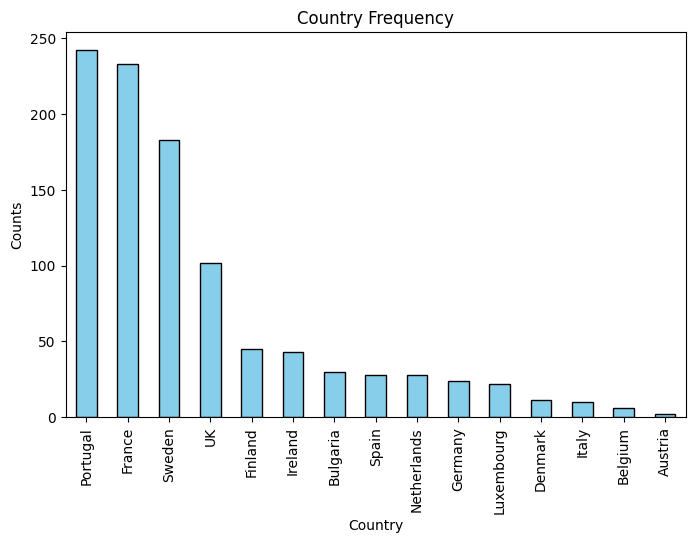

In [53]:
country_freq.plot(kind= 'bar',
                  xlabel= 'Country',
                  ylabel= 'Counts',
                  title= 'Country Frequency',
                  edgecolor= 'black',
                  color= 'skyblue',
                  figsize= (8,5))

In [54]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [55]:
category_freq = final_df['category'].value_counts()
category_freq

category
Clothing       157
Games          140
Electronics    134
Appliances     133
Books          119
Beauty         116
Smartphones     95
Outdoors        50
Accessories     36
Other           29
Name: count, dtype: int64

<Axes: title={'center': 'Category Frequency'}, xlabel='Category', ylabel='Counts'>

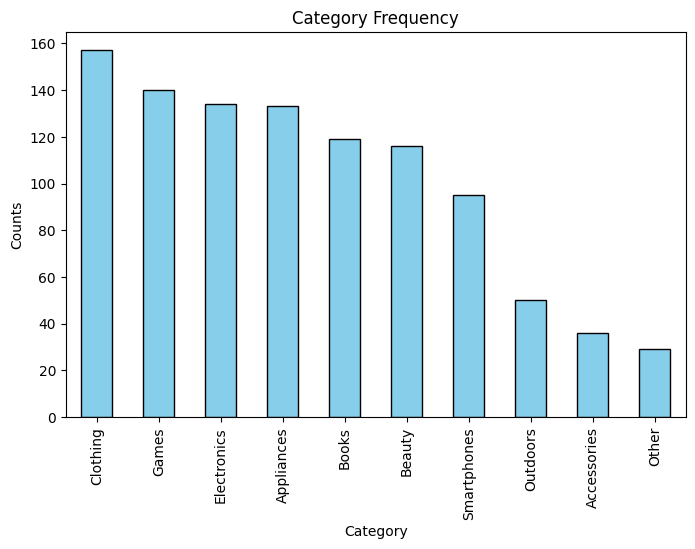

In [62]:
category_freq.plot(kind= 'bar',
                   xlabel= 'Category',
                   ylabel= 'Counts',
                   title= 'Category Frequency',
                   edgecolor= 'black',
                   color= 'skyblue',
                   figsize= (8,5))

In [63]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [65]:
customer_rep = final_df['customer_name'].value_counts()
customer_rep

customer_name
Johns and Sons                       143
Hessel-Stiedemann                     57
Swaniawski, Runolfsson and Green      25
Dickinson, Hyatt and Berge            24
Murray, Reichel and Nolan             23
                                    ... 
Baumbach Group                         2
Parisian, Steuber and Satterfield      2
Gorczany-Lehner                        1
Lind, Mueller and Stoltenberg          1
Littel-Blick                           1
Name: count, Length: 75, dtype: int64

In [66]:
sales_man = final_df['sales_manager'].value_counts()
sales_man

sales_manager
Celine Tumasian     242
Othello Bowes       233
Maxie Marrow        183
Jessamine Apark     102
Hube Corey           45
Glenine Suttaby      43
Charil Alpe          30
Emalia Dinse         28
Denice Amberg        28
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: count, dtype: int64

In [68]:
sales_rep = final_df['sales_rep'].value_counts()
sales_rep.head()

sales_rep
Amelina Piscopiello    56
Corene Shirer          53
Aurelie Wren           52
Hortense Gerring       52
Ora Grennan            50
Name: count, dtype: int64

In [70]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [74]:
final_df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
refund                      int64
dtype: object

In [75]:
descrie_columns = ['order_value_EUR','cost','refund']

describe_sum = final_df[descrie_columns].describe()
describe_sum

,order_value_EUR,cost,refund
count,1009.000000,1009.000000,1009.000000
mean,113267.885208,94422.763518,49236.007929
std,61615.866535,51693.620772,28744.989463
min,15100.570000,12113.680000,1009.000000
25%,65760.390000,54635.770000,24597.000000
50%,105357.645000,86928.030000,48652.000000
75%,151012.120000,126080.020000,74664.000000
max,383996.760000,304701.430000,99539.000000


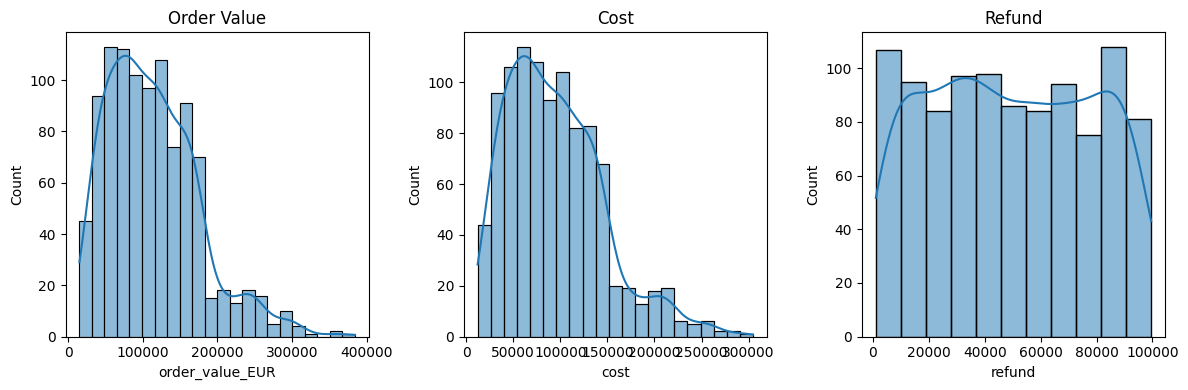

In [78]:
plt.figure(figsize= (12,4))

plt.subplot(131)
sns.histplot(final_df['order_value_EUR'], kde= True)
plt.title('Order Value')

plt.subplot(132)
sns.histplot(final_df['cost'], kde= True)
plt.title('Cost')

plt.subplot(133)
sns.histplot(final_df['refund'], kde= True)
plt.title('Refund')

plt.tight_layout()
plt.show()

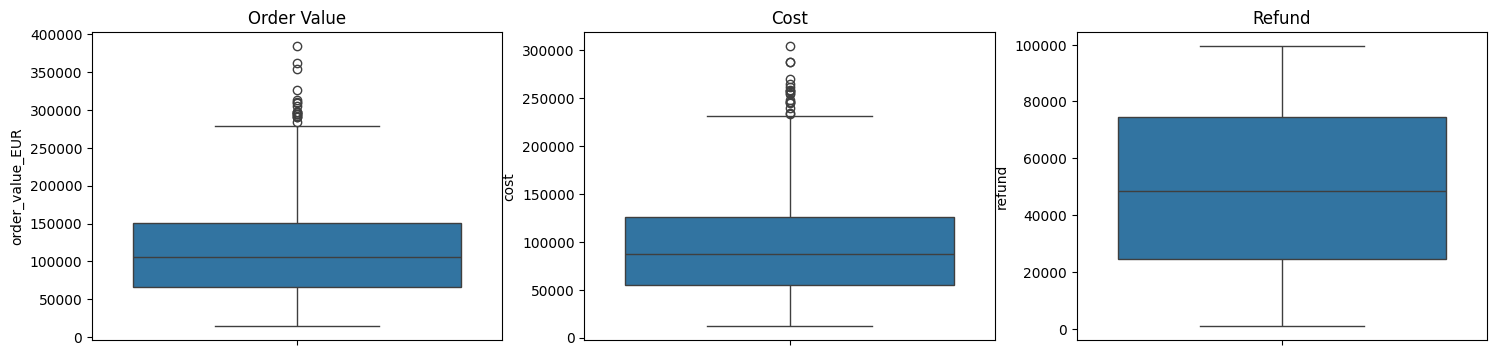

In [83]:
plt.figure(figsize= (18,4))

plt.subplot(131)
sns.boxplot(final_df['order_value_EUR'])
plt.title('Order Value')

plt.subplot(132)
sns.boxplot(final_df['cost'])
plt.title('Cost')

plt.subplot(133)
sns.boxplot(final_df['refund'])
plt.title('Refund')

plt.show()

In [84]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [87]:
category_by_order = final_df.groupby('category')['order_value_EUR'].median()
category_by_order.sort_values(ascending= False).head(3)

category
Accessories    139619.740
Outdoors       111875.915
Smartphones    111639.290
Name: order_value_EUR, dtype: float64

In [89]:
category_by_cost = final_df.groupby('category')['cost'].mean()
category_by_cost.sort_values(ascending = False).head(3)

category
Accessories    112406.486667
Smartphones     97694.810526
Outdoors        97646.258600
Name: cost, dtype: float64

In [92]:
customer_by_order = final_df.groupby('customer_name')['order_value_EUR'].median()
customer_by_order.sort_values(ascending = False).head(3)

customer_name
Schuster Inc                  201573.23
Tromp LLC                     172340.86
Jacobson, Marvin and Brown    158011.30
Name: order_value_EUR, dtype: float64

In [93]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [94]:
pivot_table = final_df.pivot_table(index= 'customer_name',
                                   values= ['order_value_EUR', 'cost'],
                                   aggfunc= {'order_value_EUR': 'median',
                                             'cost': 'median',
                                             'customer_name': 'count'})
pivot_table

,cost,customer_name,order_value_EUR
customer_name,,,
"Abbott, Roberts and Torp",81981.805,2,95588.925
Altenwerth-Konopelski,83558.660,20,98899.040
Armstrong-Little,79702.550,19,95307.210
"Bashirian, Okuneva and Bechtelar",95432.730,13,109713.840
Baumbach Group,71035.765,2,85769.965
...,...,...,...
Wisoky Inc,94336.180,21,115226.800
Wiza and Sons,77966.600,13,90228.680
Wunsch LLC,96598.720,6,118701.875


In [97]:
pivot_table = pivot_table.rename(columns= {'customer_name': 'Count', 
                                           'cost':'Cost',
                                           'order_value_EUR': 'Order Value'})
pivot_table

,Cost,Count,Order Value
customer_name,,,
"Abbott, Roberts and Torp",81981.805,2,95588.925
Altenwerth-Konopelski,83558.660,20,98899.040
Armstrong-Little,79702.550,19,95307.210
"Bashirian, Okuneva and Bechtelar",95432.730,13,109713.840
Baumbach Group,71035.765,2,85769.965
...,...,...,...
Wisoky Inc,94336.180,21,115226.800
Wiza and Sons,77966.600,13,90228.680
Wunsch LLC,96598.720,6,118701.875


In [100]:
pivot_table.sort_values('Count', ascending= False)

,Cost,Count,Order Value
customer_name,,,
Johns and Sons,86694.330,143,106115.850
Hessel-Stiedemann,79127.710,57,95960.770
"Swaniawski, Runolfsson and Green",84690.350,25,100094.970
"Dickinson, Hyatt and Berge",85886.100,24,104540.680
"Murray, Reichel and Nolan",71501.100,23,88832.280
...,...,...,...
"Parisian, Steuber and Satterfield",99724.245,2,118245.075
"Abbott, Roberts and Torp",81981.805,2,95588.925
Gorczany-Lehner,26770.530,1,33724.530


In [101]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176


In [102]:
manager_by_category = pd.crosstab(final_df['sales_manager'], final_df['category'])
manager_by_category

category,Accessories,Appliances,Beauty,Books,Clothing,Electronics,Games,Other,Outdoors,Smartphones
sales_manager,,,,,,,,,,
Celine Tumasian,8,30,27,27,40,28,40,6,13,23
Charil Alpe,1,4,2,6,3,4,5,0,2,3
Denice Amberg,0,2,1,4,6,4,4,0,2,5
Emalia Dinse,0,1,4,1,5,7,5,2,1,2
Glenine Suttaby,1,3,6,3,6,7,6,2,3,6
Hube Corey,1,8,6,2,8,5,12,1,2,0
Ilsa Kob,2,2,3,3,3,2,3,0,2,2
Jessamine Apark,7,11,10,14,18,8,14,2,10,8
Lambert Norheny,1,2,0,0,1,0,1,0,0,1


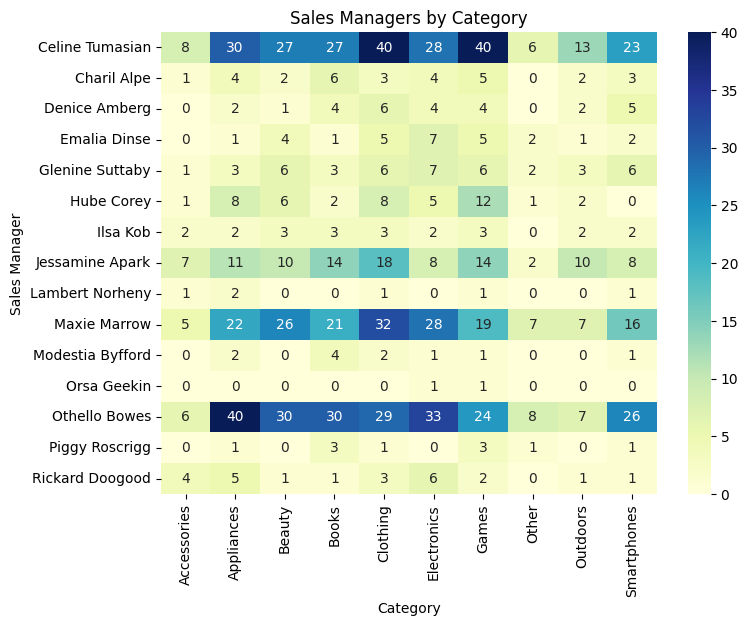

In [109]:
plt.figure(figsize= (8,6))
sns.heatmap(manager_by_category, annot= True, cmap= 'YlGnBu')
plt.title('Sales Managers by Category')
plt.xlabel('Category')
plt.ylabel('Sales Manager')
plt.show()

In [110]:
rep_by_country = pd.crosstab(final_df['sales_rep'], final_df['country'])
rep_by_country

country,Austria,Belgium,Bulgaria,Denmark,Finland,France,Germany,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,Sweden,UK
sales_rep,,,,,,,,,,,,,,,
Alyosha Meah,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0
Amelina Piscopiello,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0
Anita Woakes,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0
Aurelie Wren,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0
Avrit Chanders,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0
Bank Coumbe,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bernadine Fullagar,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
Bertha Walbrook,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
Brynn Dempster,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0


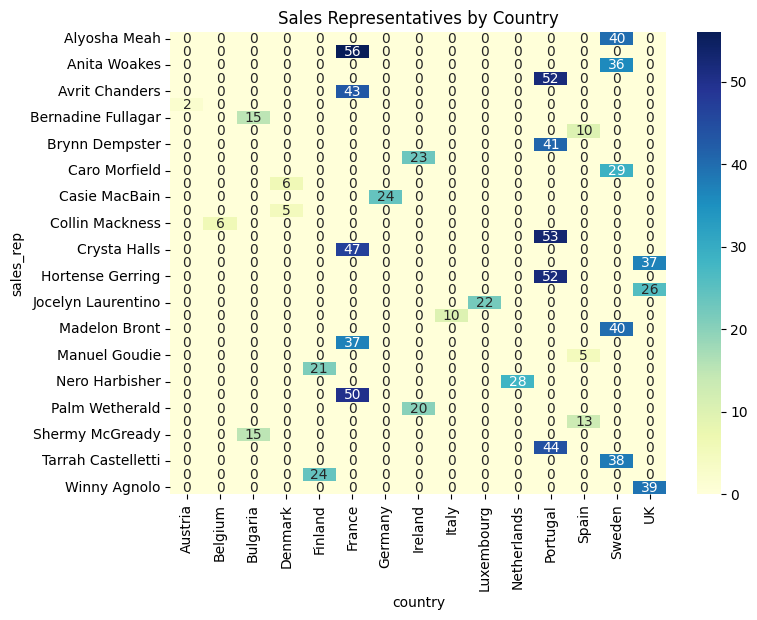

In [111]:
plt.figure(figsize= (8,6))
sns.heatmap(rep_by_country, annot= True, cmap= 'YlGnBu')
plt.title('Sales Representatives by Country')
plt.show()

In [113]:
correlation_matrix = final_df[['order_value_EUR','cost','refund']].corr()
correlation_matrix

,order_value_EUR,cost,refund
order_value_EUR,1.000000,0.991741,0.927242
cost,0.991741,1.000000,0.924964
refund,0.927242,0.924964,1.000000
